### COVID-19 
### UPDATE by DAY in the countries: 
#### CHINA, GERMANY, ITALY, KOREA, JAPAN, USA, AUSTRALIA, LUXEMBOURG, UK, CANADA, VIETNAM
#### (Start recorded day: 22.01.2020)

In [1]:
from covid import *
%matplotlib inline

Start importing World-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/
Start importing USA-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
Start importing single data  ./data/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


In [2]:
len(countries_no_infopopulation)

35

In [3]:
countries_no_infopopulation

['Hong Kong',
 'Vatican City',
 'Cayman Islands',
 'Greenland',
 'Puerto Rico',
 'occupied Palestinian territory',
 'Gibraltar',
 'North Ireland',
 'Curacao',
 'Aruba',
 'St. Martin',
 'Martinique',
 'The Gambia',
 'Guernsey',
 'East Timor',
 'Mayotte',
 ' Azerbaijan',
 'Taipei and environs',
 'Cape Verde',
 'Faroe Islands',
 'Guam',
 'Republic of Moldova',
 'Guadeloupe',
 'Saint Barthelemy',
 'Jersey',
 'Republic of the Congo',
 'Reunion',
 'Channel Islands',
 'Palestine',
 'The Bahamas',
 'Ivory Coast',
 'Saint Martin',
 'French Guiana',
 'Macau',
 'Others_and_ships']

### Number of covid-19 outbreak days 

In [4]:
rcParams['figure.figsize'] = 20, 10
len(data)

451

In [5]:
updated_date=files[-1].split('.')[0]
updated_date

'04-16-2021'

### New cases in the World changed by day

### ARE WE BEATING COVID-19?

The World still has 57250600.0 active cases

In last 7 days:  [55536865. 55690822. 55906190. 56188506. 56547737. 56909989. 57250600.]


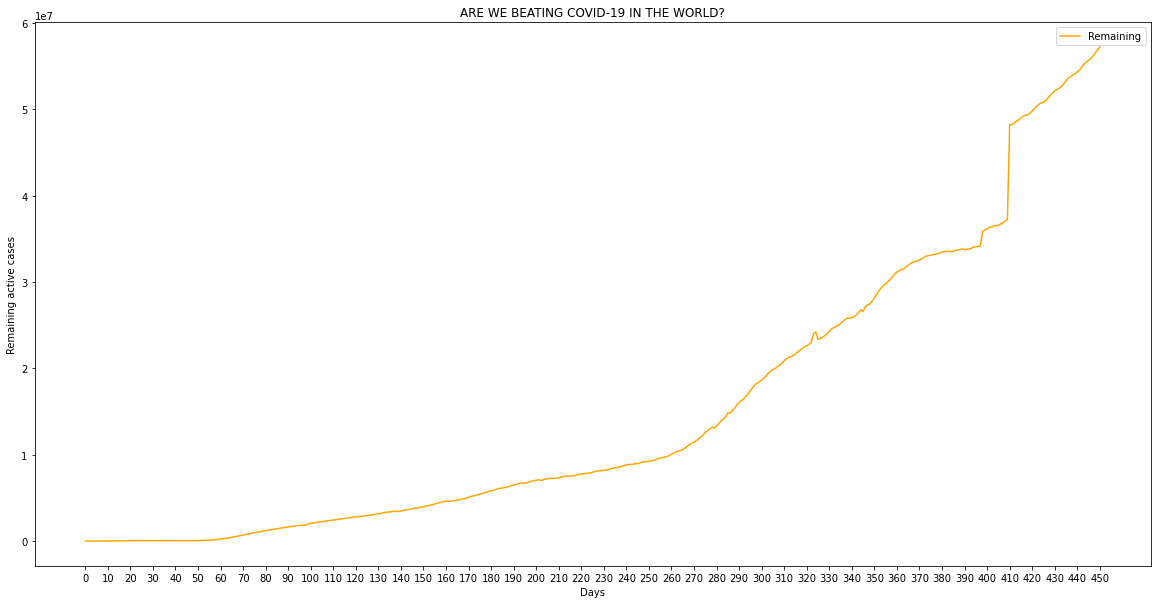

In [6]:
remaining_by_day = np.array(totalconfirmed_by_day) - np.array(totalrecovered_by_day) - np.array(totalfatalities_by_day)

plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(x_dat, remaining_by_day, color='orange', label='Remaining')
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("ARE WE BEATING COVID-19 IN THE WORLD?")
plt.legend()
plt.savefig('output/AreWeBeatingCovid.jpg')
print("The World still has %0.1f active cases\n"% remaining_by_day[-1])
print("In last 7 days: ", remaining_by_day[-7:])

In [7]:
countries_remaining = countries_confirmed-countries_fatalities-countries_recovered
countries_remaining.tail(1)

,Hong Kong,Guinea,Luxembourg,Namibia,Singapore,Tunisia,Vatican City,Mexico,Israel,Slovakia,...,Albania,Saint Vincent and the Grenadines,Cameroon,Barbados,Central African Republic,Cabo Verde,Grenada,Nepal,Syria,Others_and_ships
450,0.0,2398.0,3334.0,1339.0,293.0,39495.0,0.0,323002.0,2385.0,108316.0,...,26370.0,132.0,25551.0,73.0,541.0,1916.0,2.0,5008.0,4839.0,0.0


In [8]:
daily_confirmed_sum = np.array([sum(countries_confirmed.iloc[i]) for i in range(len(countries_confirmed))])
daily_fatal_sum = np.array([sum(countries_fatalities.iloc[i]) for i in range(len(countries_fatalities))])
daily_recovered_sum = np.array([sum(countries_recovered.iloc[i]) for i in range(len(countries_recovered))])

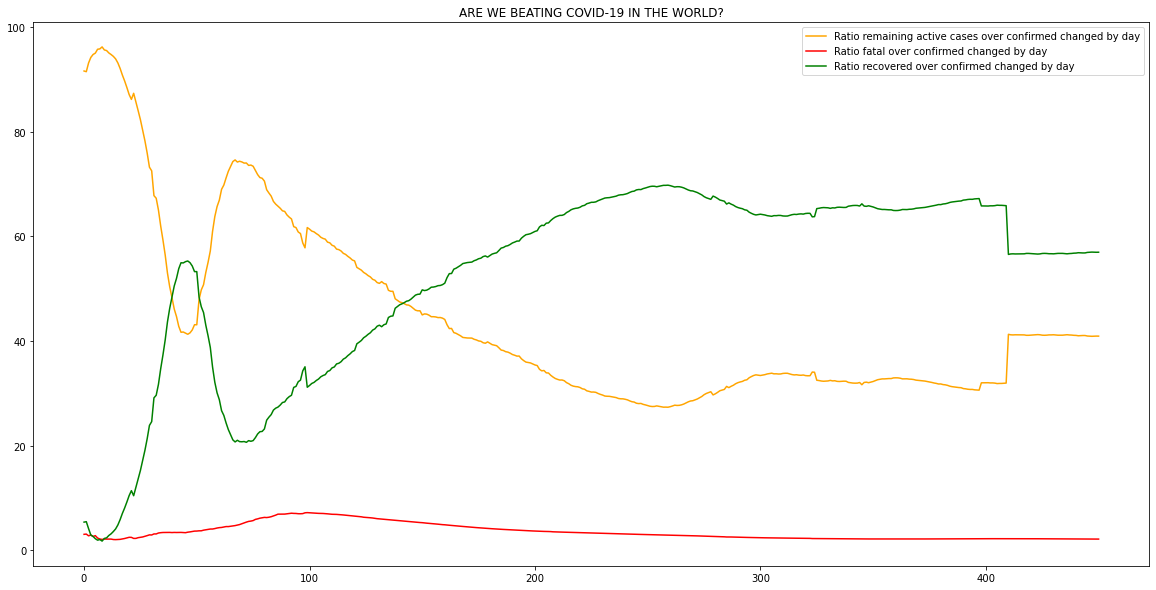

In [9]:
plt.plot(x_dat, ((daily_confirmed_sum-daily_recovered_sum-daily_fatal_sum)/daily_confirmed_sum)*100, color='orange', label='Ratio remaining active cases over confirmed changed by day')
plt.plot(x_dat, (daily_fatal_sum/daily_confirmed_sum)*100, color='red', label='Ratio fatal over confirmed changed by day')
plt.plot(x_dat, (daily_recovered_sum/daily_confirmed_sum)*100, color='green', label='Ratio recovered over confirmed changed by day')
plt.title("ARE WE BEATING COVID-19 IN THE WORLD?")
plt.legend()
plt.savefig('output/AreWeBeatingCovid_ratio.jpg')

### Countries are beating COVID most

,450
Hong Kong,0.0
Curacao,0.0
Saint Kitts and Nevis,0.0
Tajikistan,0.0
MS Zaandam,0.0
Aruba,0.0
St. Martin,0.0
Martinique,0.0
The Gambia,0.0
Guernsey,0.0


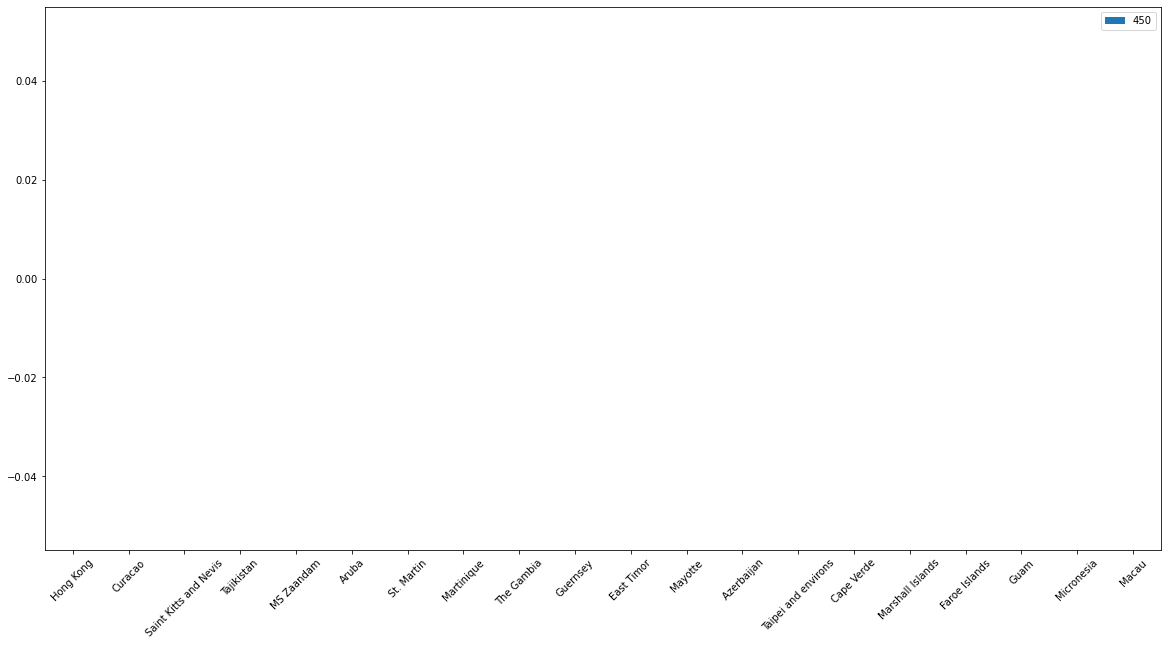

In [10]:
index = countries_remaining.tail(1)
top_remaining = countries_remaining.tail(1).transpose().sort_values(by=index.index[0], ascending=True).head(20)
top_remaining.plot(kind='bar')
plt.xticks(rotation=45)
top_remaining

,Hong Kong,Curacao,Saint Kitts and Nevis,Tajikistan,MS Zaandam,Aruba,St. Martin,Martinique,The Gambia,Guernsey,East Timor,Mayotte,Azerbaijan,Taipei and environs,Cape Verde,Marshall Islands,Faroe Islands,Guam,Micronesia,Macau
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


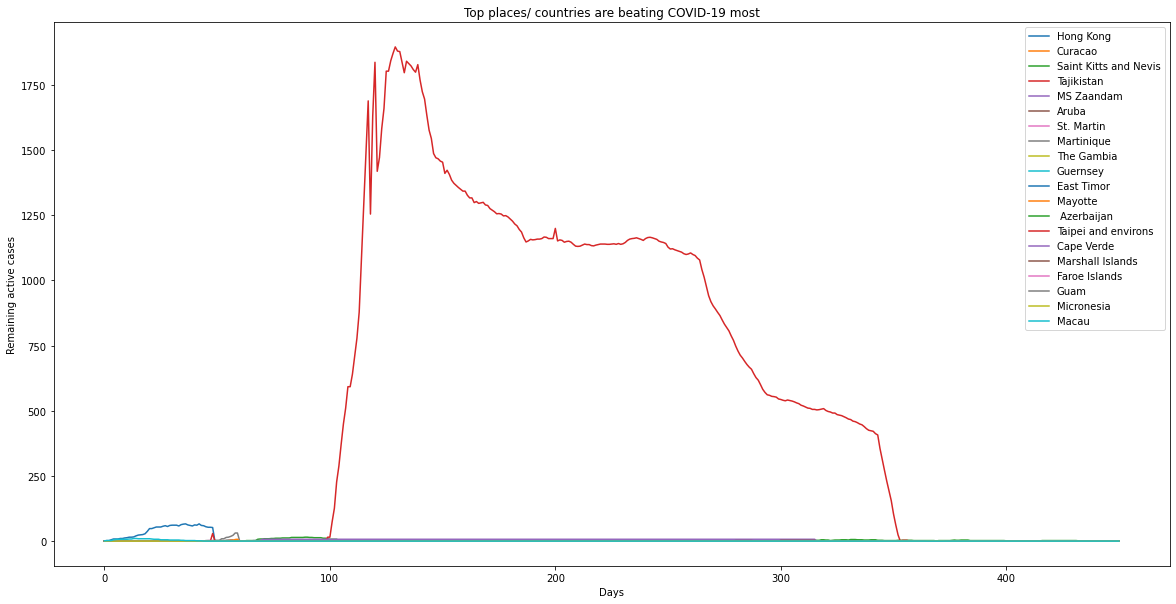

In [11]:
countries_remaining[top_remaining.index].plot()
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("Top places/ countries are beating COVID-19 most")
countries_remaining[top_remaining.index]

### Countries are beating COVID least

,450
US,31009416.0
France,4858989.0
United Kingdom,4257494.0
Spain,3179926.0
India,1679740.0
Netherlands,1374168.0
Brazil,1299875.0
Belgium,919532.0
Sweden,886350.0
Serbia,651796.0


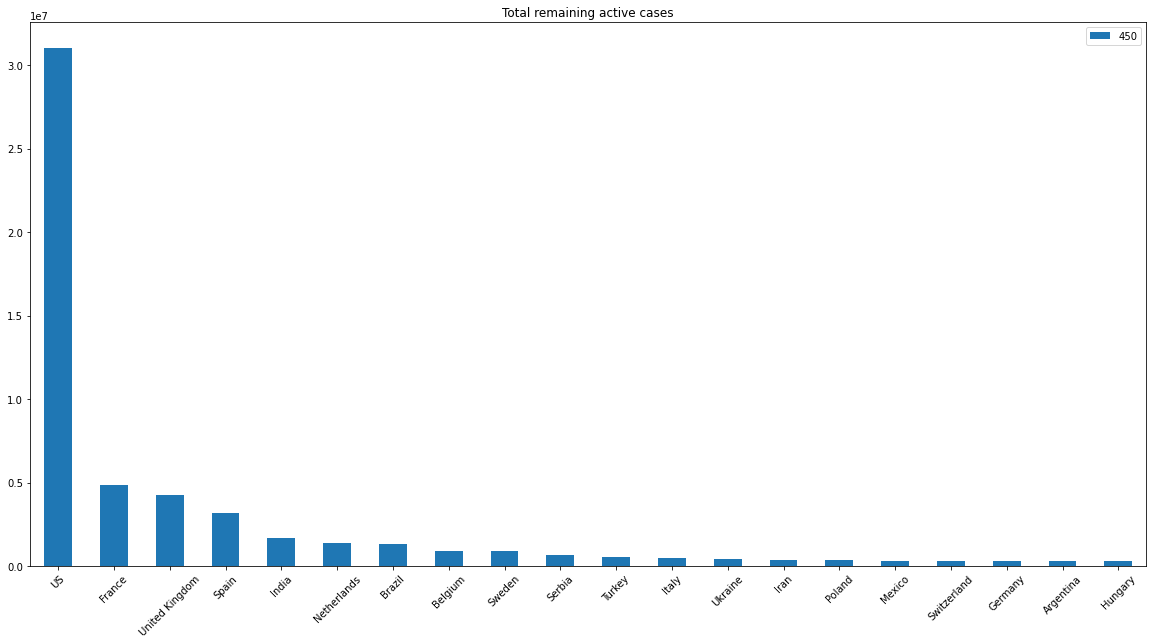

In [12]:
bottom_remaining = countries_remaining.tail(1).transpose().sort_values(by=index.index[0], ascending=False).head(20)
bottom_remaining.plot(kind='bar')
plt.title("Total remaining active cases")
plt.xticks(rotation=45)
bottom_remaining

Text(0.5, 1.0, 'Top places/ countries are beating COVID-19 least')

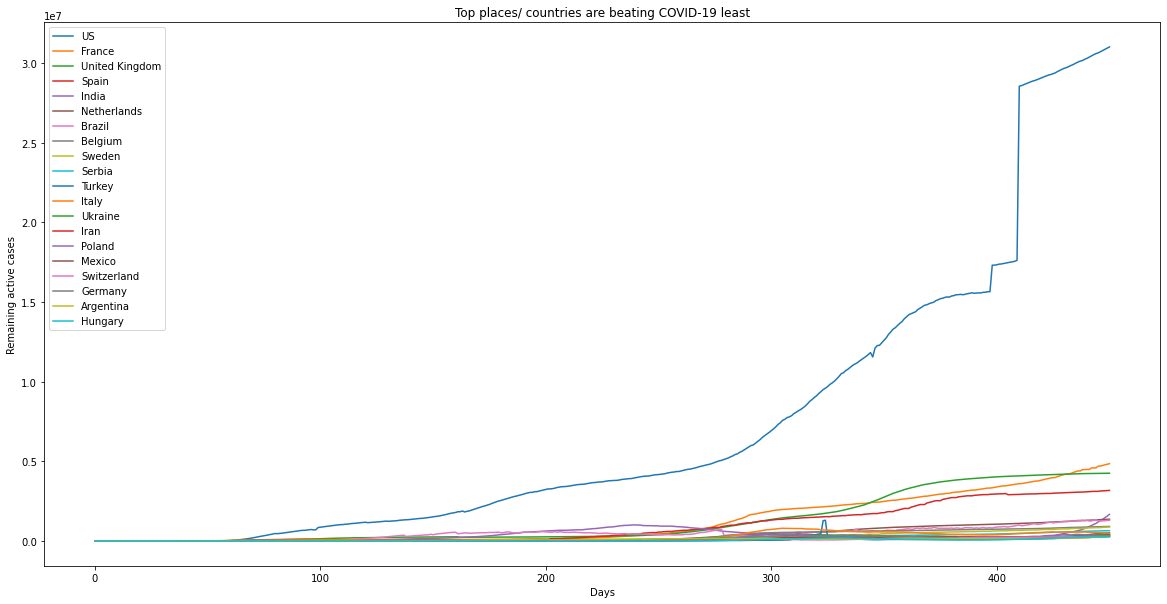

In [13]:
countries_remaining[bottom_remaining.index].plot()
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("Top places/ countries are beating COVID-19 least")

#### The current remaining days is not included with the recovered data from US. 
#### See: https://github.com/CSSEGISandData/COVID-19/issues/3464